In [ ]:
!pip install --upgrade xlrd
!pip install --upgrade pandas
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 5.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.0 MB/s 
     |████████████████████████████████| 9.9 MB 33.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from pmdarima import auto_arima
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
path = r"/content/drive/MyDrive/Colab Notebooks/Data/data/strongest drop/APH.xlsx"
data = pd.read_excel(path)
stock_train = data.loc[:129]
stock_predict = data.loc[129:]

In [ ]:
data_train_length = len(stock_train)
data_train = stock_train.loc[0:data_train_length-1];
data_train_frame = pd.DataFrame(data_train['Close'].to_numpy(), index = stock_train.loc[0:data_train_length-1]['Date'], columns=['Price'])
data_predict_frame = pd.DataFrame(stock_predict['Close'].to_numpy(),index = stock_predict['Date'], columns=['Price'])

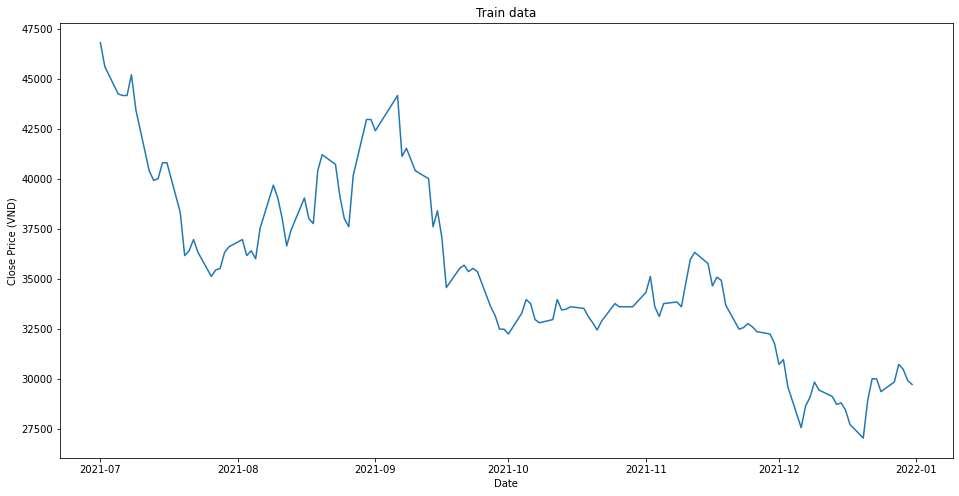

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Train data')
plt.xlabel('Date')
plt.ylabel('Close Price (VND)')
plt.plot(data_train_frame)

In [ ]:
stepwise_model = auto_arima(data_train_frame['Price'], test='adf',
                      max_p=3, max_q=3,
                      m=1,
                      d=None,
                      seasonal=False,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2161.261, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2163.250, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2163.430, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2161.357, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2164.891, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.992 seconds


In [ ]:
stepwise_model.aic()

2161.261234020468

In [ ]:
stepwise_model.fit(data_train_frame)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
future_data = stepwise_model.predict(n_periods=len(data_predict_frame))
future_data_frame = pd.DataFrame(future_data.to_numpy(), index=data_predict_frame.index, columns = ['Price'])

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


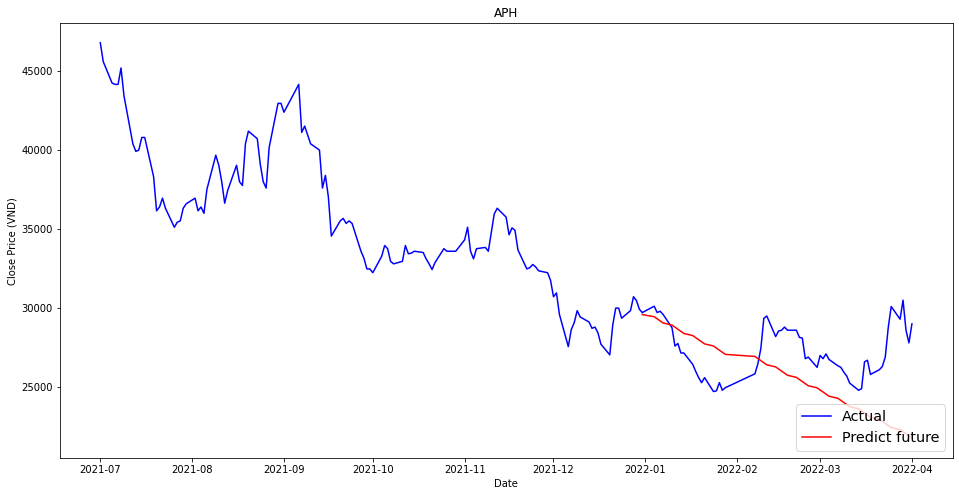

In [ ]:
plt.figure(figsize=(16,8))
plt.title('APH')
plt.xlabel('Date')
plt.ylabel('Close Price (VND)')
plt.plot(data_train_frame, color='blue', label='Actual')
plt.plot(data_predict_frame, color='blue')
plt.plot(future_data_frame, color='red', label='Predict future')
plt.legend(loc='lower right', fontsize='x-large')

In [ ]:
rsquare = r2_score(data_predict_frame['Price'].to_numpy(), future_data_frame['Price'].to_numpy())
mae = mean_absolute_error(data_predict_frame['Price'].to_numpy(), future_data_frame['Price'].to_numpy())

In [ ]:
print(rsquare)
print(mae)

-2.825839126413155
2574.229974160225
